In [1]:
# Data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn, seed

# Machine Learning libraries
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import f1_score

# Other libraries
import sys
sys.path.append("../files")
import utils

<h2 style="color:crimson">Ejercicio</h2>

1. Crea un pipeline llamado `model` que primero transforme el espacio con un polinomio de grado 30 (sin incluir p0) y, posteriormente, considere la transformación de los datos con una regresión logística sin regularización (`LogisticRegression(penalty="none")`)
2. Realiza un _Bagging Classifer_ de `model` llamado `bagging_logreg` con `n_estimators=100` y `random_state=314`
3. Entrena `model` y `bagging_logreg` considerando `X` y `y` definido arriba
4. Grafica la función de decisión dada por `model` y por `bagging_logreg` ¿Qué observas?
5. Considerando un `f1_score` (dentro de `sklearn.metrics`), calcula el *f1-score* sobre el test set (`X_test`, `y_test`) considerando `model` y `bagging_logreg`. ¿Qué resultados arroja?

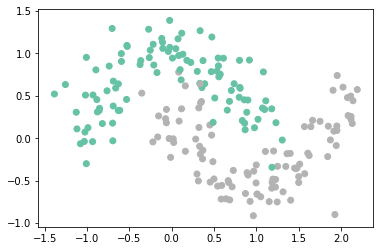

In [2]:
# Datos
noise = 0.2
X, y = make_moons(200, noise=noise, random_state=2718)
X_test, y_test = make_moons(40, noise=noise, random_state=31415)
plt.scatter(*X.T, c=y, cmap="Set2")

In [3]:
# Inciso 1
model = Pipeline([
    ("poly_transform", PolynomialFeatures(degree=30, include_bias=False)),
    ("logistic_regresion", LogisticRegression(penalty="none"))
])

In [4]:
# Inciso 2
bagging_logreg = BaggingClassifier( model, n_estimators=100, random_state=314 )
#                                  bootstrap=True, max_samples=100, n_jobs=-1)

In [5]:
# Inciso 3
model.fit(X, y);
bagging_logreg.fit(X, y);

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

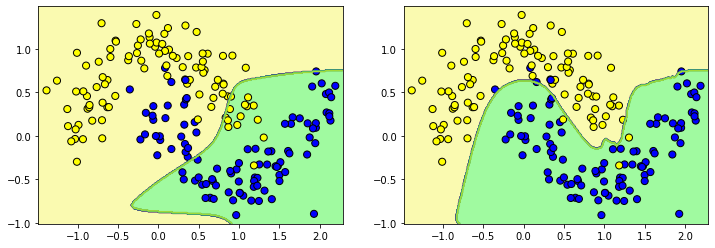

In [6]:
# Inciso 4
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

utils.plot_classf_model(X, y, model, ax=ax[0], contour=True)
utils.plot_classf_model(X, y, bagging_logreg, ax=ax[1], contour=True)

Se puede observar que para la figura de la izquierda, donde se está dibujando el resultado con los datos de entrenamiento para el modelo de regresión logística, existe un claro overfitting del modelo puesto que está priorizando los datos del conjunto azul por encima del otro conjunto de datos. En cambio, para el modelo de ensamble con bagging se nota que el modelo logra separar de una manera mucho más precisa al conjunto de entrenamiento.

In [7]:
# Inciso 5
print("Score de model:", f1_score( y_test, model.predict(X_test) ) )
print("Score de bagging_logreg:",  f1_score( y_test, bagging_logreg.predict(X_test) ) )

Score de model: 0.7567567567567567
Score de bagging_logreg: 0.9743589743589743


Se puede observar que el modelo usando Baggin mejora el poder predictivo del modelo de regresión logística, basándonos en el puntaje f1 mostrado arriba.